# Project diamanten

We gaan de prijs (price) voorspellen aan de hand van de andere kolommen in de diamonds.csv file.<br> 
In het vakjargon is price de **target** en de andere kolommen zijn de **features**.

## Imports van de nodige bibliotheken

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split  # klasse om data te splitsen in een leer- en testset
from sklearn.pipeline import Pipeline                 # klasse voor de data pipeline lib
from sklearn.preprocessing import StandardScaler      # klasse voor het standaardiseren van de data
from sklearn.compose import ColumnTransformer         # klasse om kolommen te transformeren en/of te verwijderen
from sklearn.linear_model import LinearRegression     # klasse voor lineaire fit 
from sklearn.metrics import mean_squared_error        # klasse voor berekenen van RMSE
import numpy as np                                    # klasse voor matrix e.a. berekeningen
from sklearn.preprocessing import PolynomialFeatures  # klasse om hogere machten toe te voegen aan de datapunten
from sklearn.svm import SVR                           # klasse voor Support Vector Machine
from sklearn.tree import DecisionTreeRegressor        # klasse voor Decision Tree
from sklearn.model_selection import GridSearchCV      # klasse voor Grid Search combinatie van hyperparemeters 
                                                      # om het model te finetunen. VC staat voor Cross Validation
                                                      # leerset wordt opgesplitst in groepen, 1 om te testen en andere om te leren

## Dataset diamonds.csv opladen

In [24]:
df = pd.read_csv("../data/diamonds.csv")

## Eerste verkenning

In [25]:
df.head()  # eerste 5 records

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Betekenis van de kolommen

***Unnamed***: 0 --> geen betekenis (gaan we verwijderen na controle)<br>
***carat***: gewicht, 1 carat = 0.2 gram<br>
***cut***: juistheid van de slijpwijze<br>
***color***: kleur. Kleurloos (D,E,F) is beter dan geel (K tot Z)<br>
***clarity***: zuiverheid. FL is zuiverst, P het minst zuiver<br>
***depth***: procentuele verhouding hoogte tov diameter (ideaal 59 tot 62%)<br>
***table***: procentuele verhouding diameter bovenste platte vlak tov totale diameter diamant (ideaal 53 tot 60%)<br>
***price***: wat voorspeld moet worden (target)<br>
***x,y,z***: afmetingen van de diamant

## Verwijderen overbodige kolom(men)

In [26]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
# Unamed: 0 is een overbodige kolom, bevat de rij id.
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Opsplitsen van data in leerset (70%) en testset (30%)

In [28]:
train_set,test_set = train_test_split(df,test_size=0.3,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in train_set:', len(train_set))
print('aantal entries in test_set: ', len(test_set))
print('stukje inhoud train_set:')
train_set.head()

aantal entries in train_set: 37758
aantal entries in test_set:  16182
stukje inhoud train_set:


,carat,cut,color,clarity,depth,table,price,x,y,z
19497,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31229,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22311,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
278,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6646,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


## Per kolom het aantal lege cellen

In [29]:
# snelle manier om lege cellen te detecteren
print('aantal entries in train_set:',len(train_set))  
train_set.info()

aantal entries in train_set: 37758
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 19497 to 15795
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37758 non-null  float64
 1   cut      37758 non-null  object 
 2   color    37758 non-null  object 
 3   clarity  37758 non-null  object 
 4   depth    37758 non-null  float64
 5   table    37758 non-null  float64
 6   price    37758 non-null  int64  
 7   x        37758 non-null  float64
 8   y        37758 non-null  float64
 9   z        37758 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [30]:
# berekenen procentueel aantal lege cellen per kolom
cols = train_set.columns  # kolomnamen van train_set ophalen
len_train = len(train_set)
for c in cols:
    print(c,':',100*train_set[c].isna().sum()/len_train,'%')

carat : 0.0 %
cut : 0.0 %
color : 0.0 %
clarity : 0.0 %
depth : 0.0 %
table : 0.0 %
price : 0.0 %
x : 0.0 %
y : 0.0 %
z : 0.0 %


In [31]:
cols = test_set.columns  # kolomnamen van test_set ophalen
len_test = len(test_set)
for c in cols:
    print(c,':',100*test_set[c].isna().sum()/len_test,'%')

carat : 0.0 %
cut : 0.0 %
color : 0.0 %
clarity : 0.0 %
depth : 0.0 %
table : 0.0 %
price : 0.0 %
x : 0.0 %
y : 0.0 %
z : 0.0 %


***Geen lege cellen aanwezig*** (zeer brave dataset)

## Algemene info en histogrammen van de train_set

In [32]:
train_set.describe()

,carat,depth,table,price,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.799763,61.744923,57.461129,3951.495312,5.735377,5.738825,3.541152
std,0.475556,1.428630,2.226637,4006.428295,1.122262,1.146605,0.711444
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,956.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2404.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5366.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


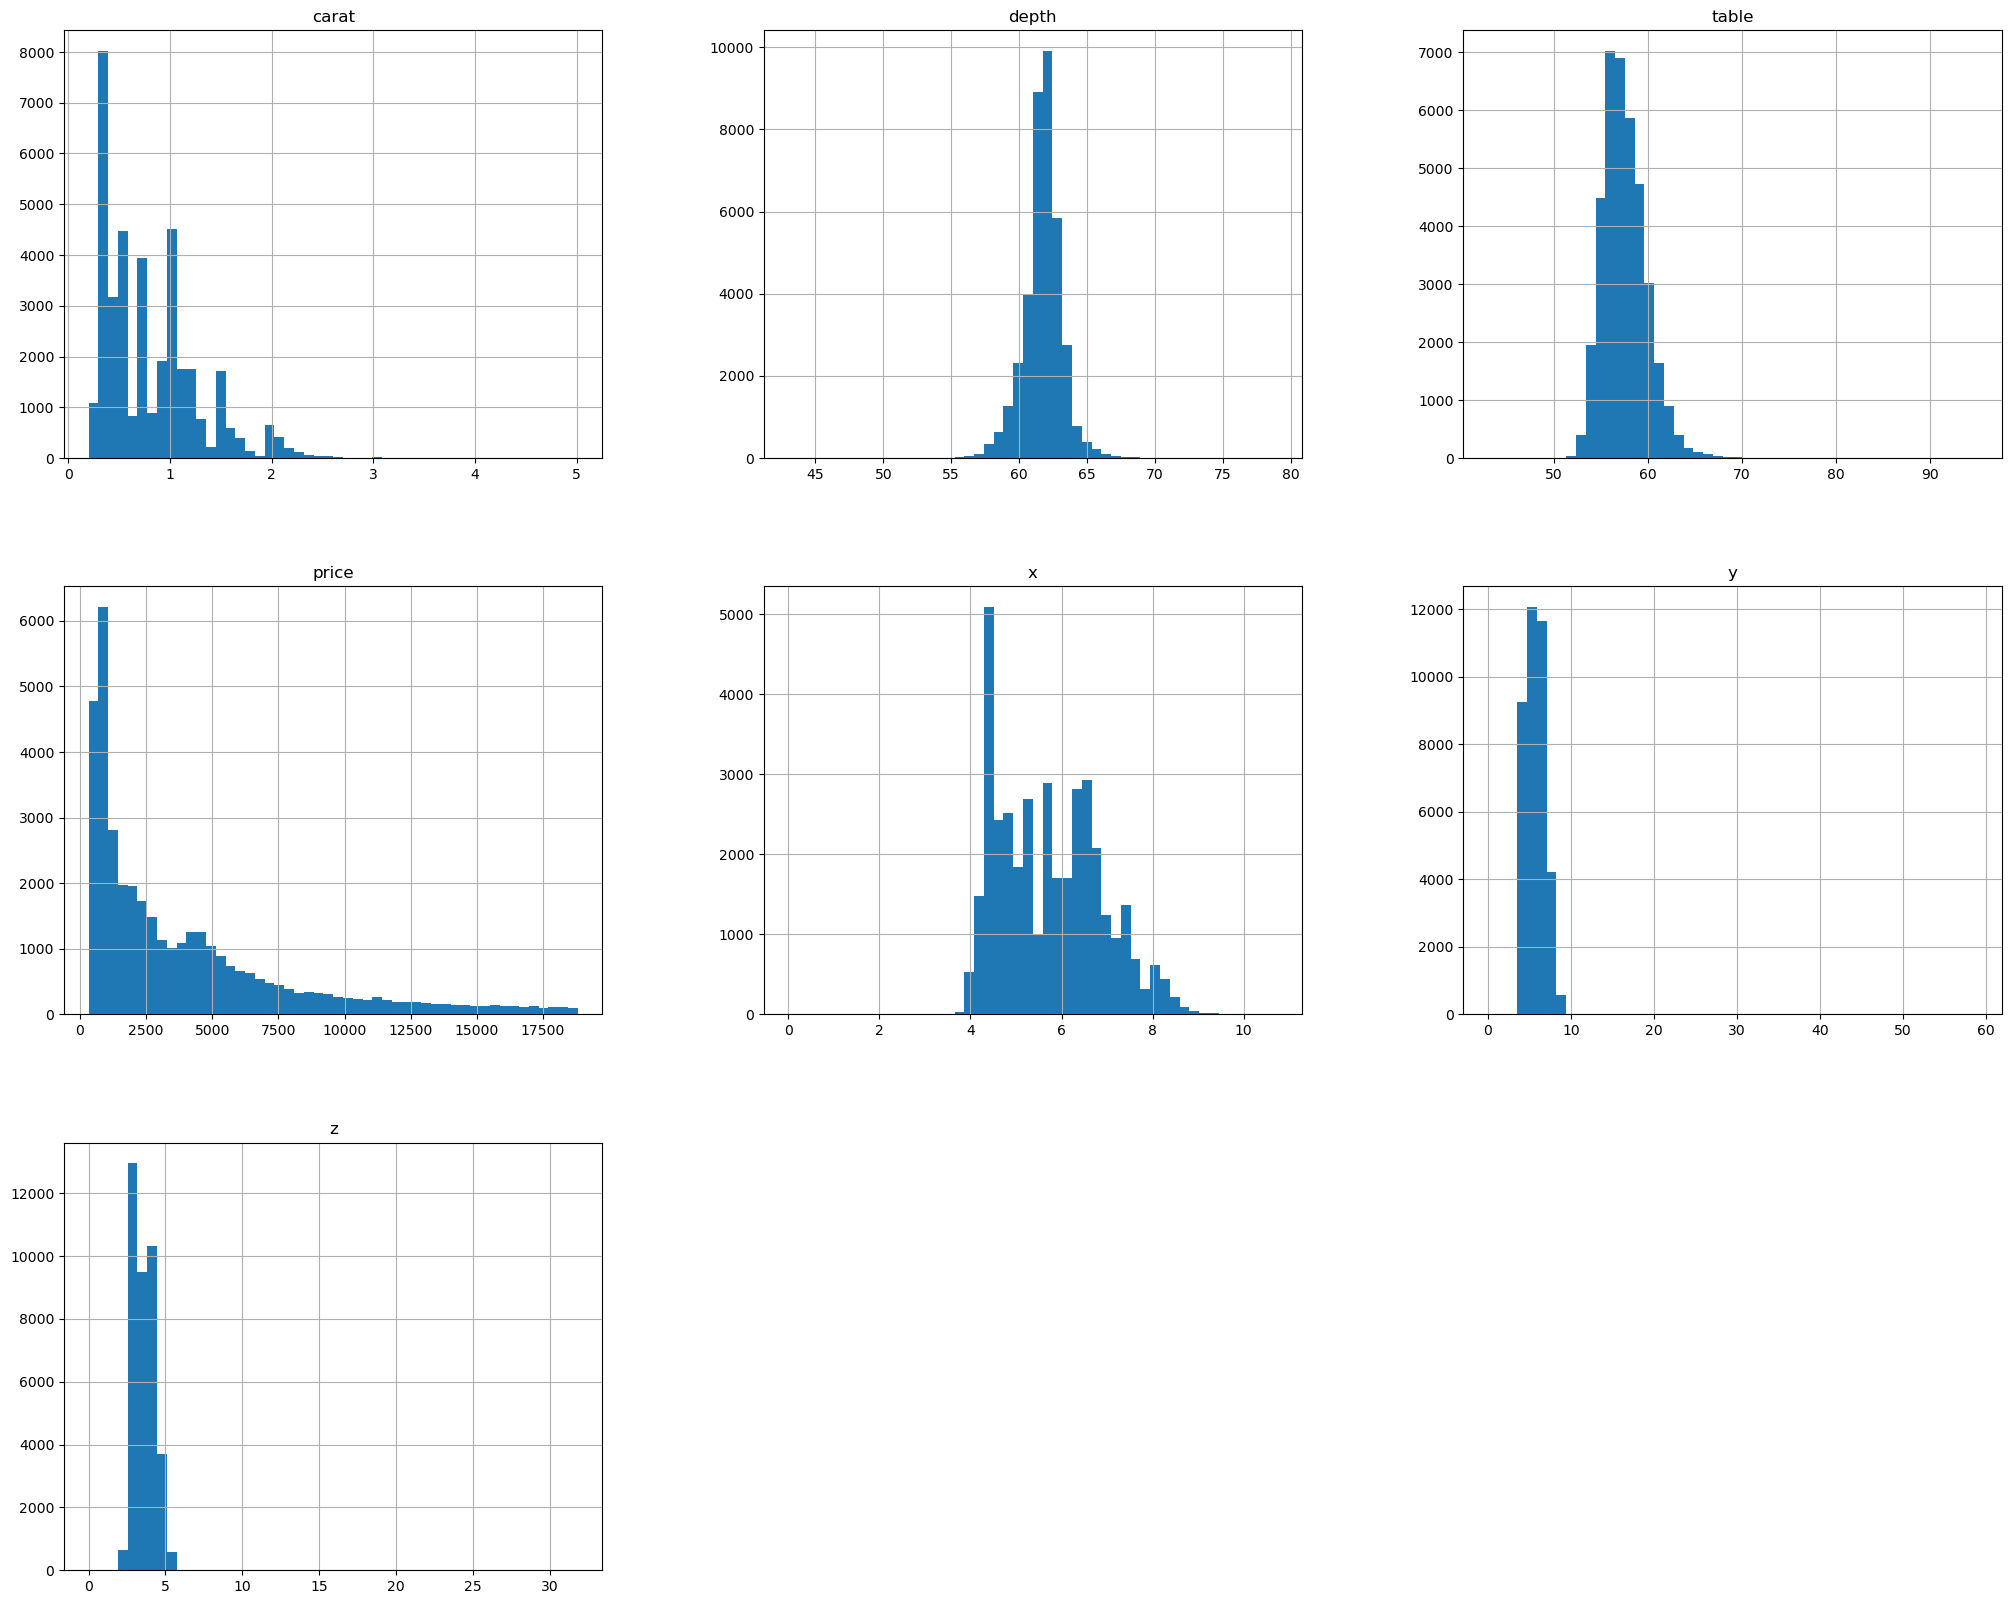

In [33]:
train_set.hist(figsize=(25,20),bins=50);

## Correlatie tussen features en price

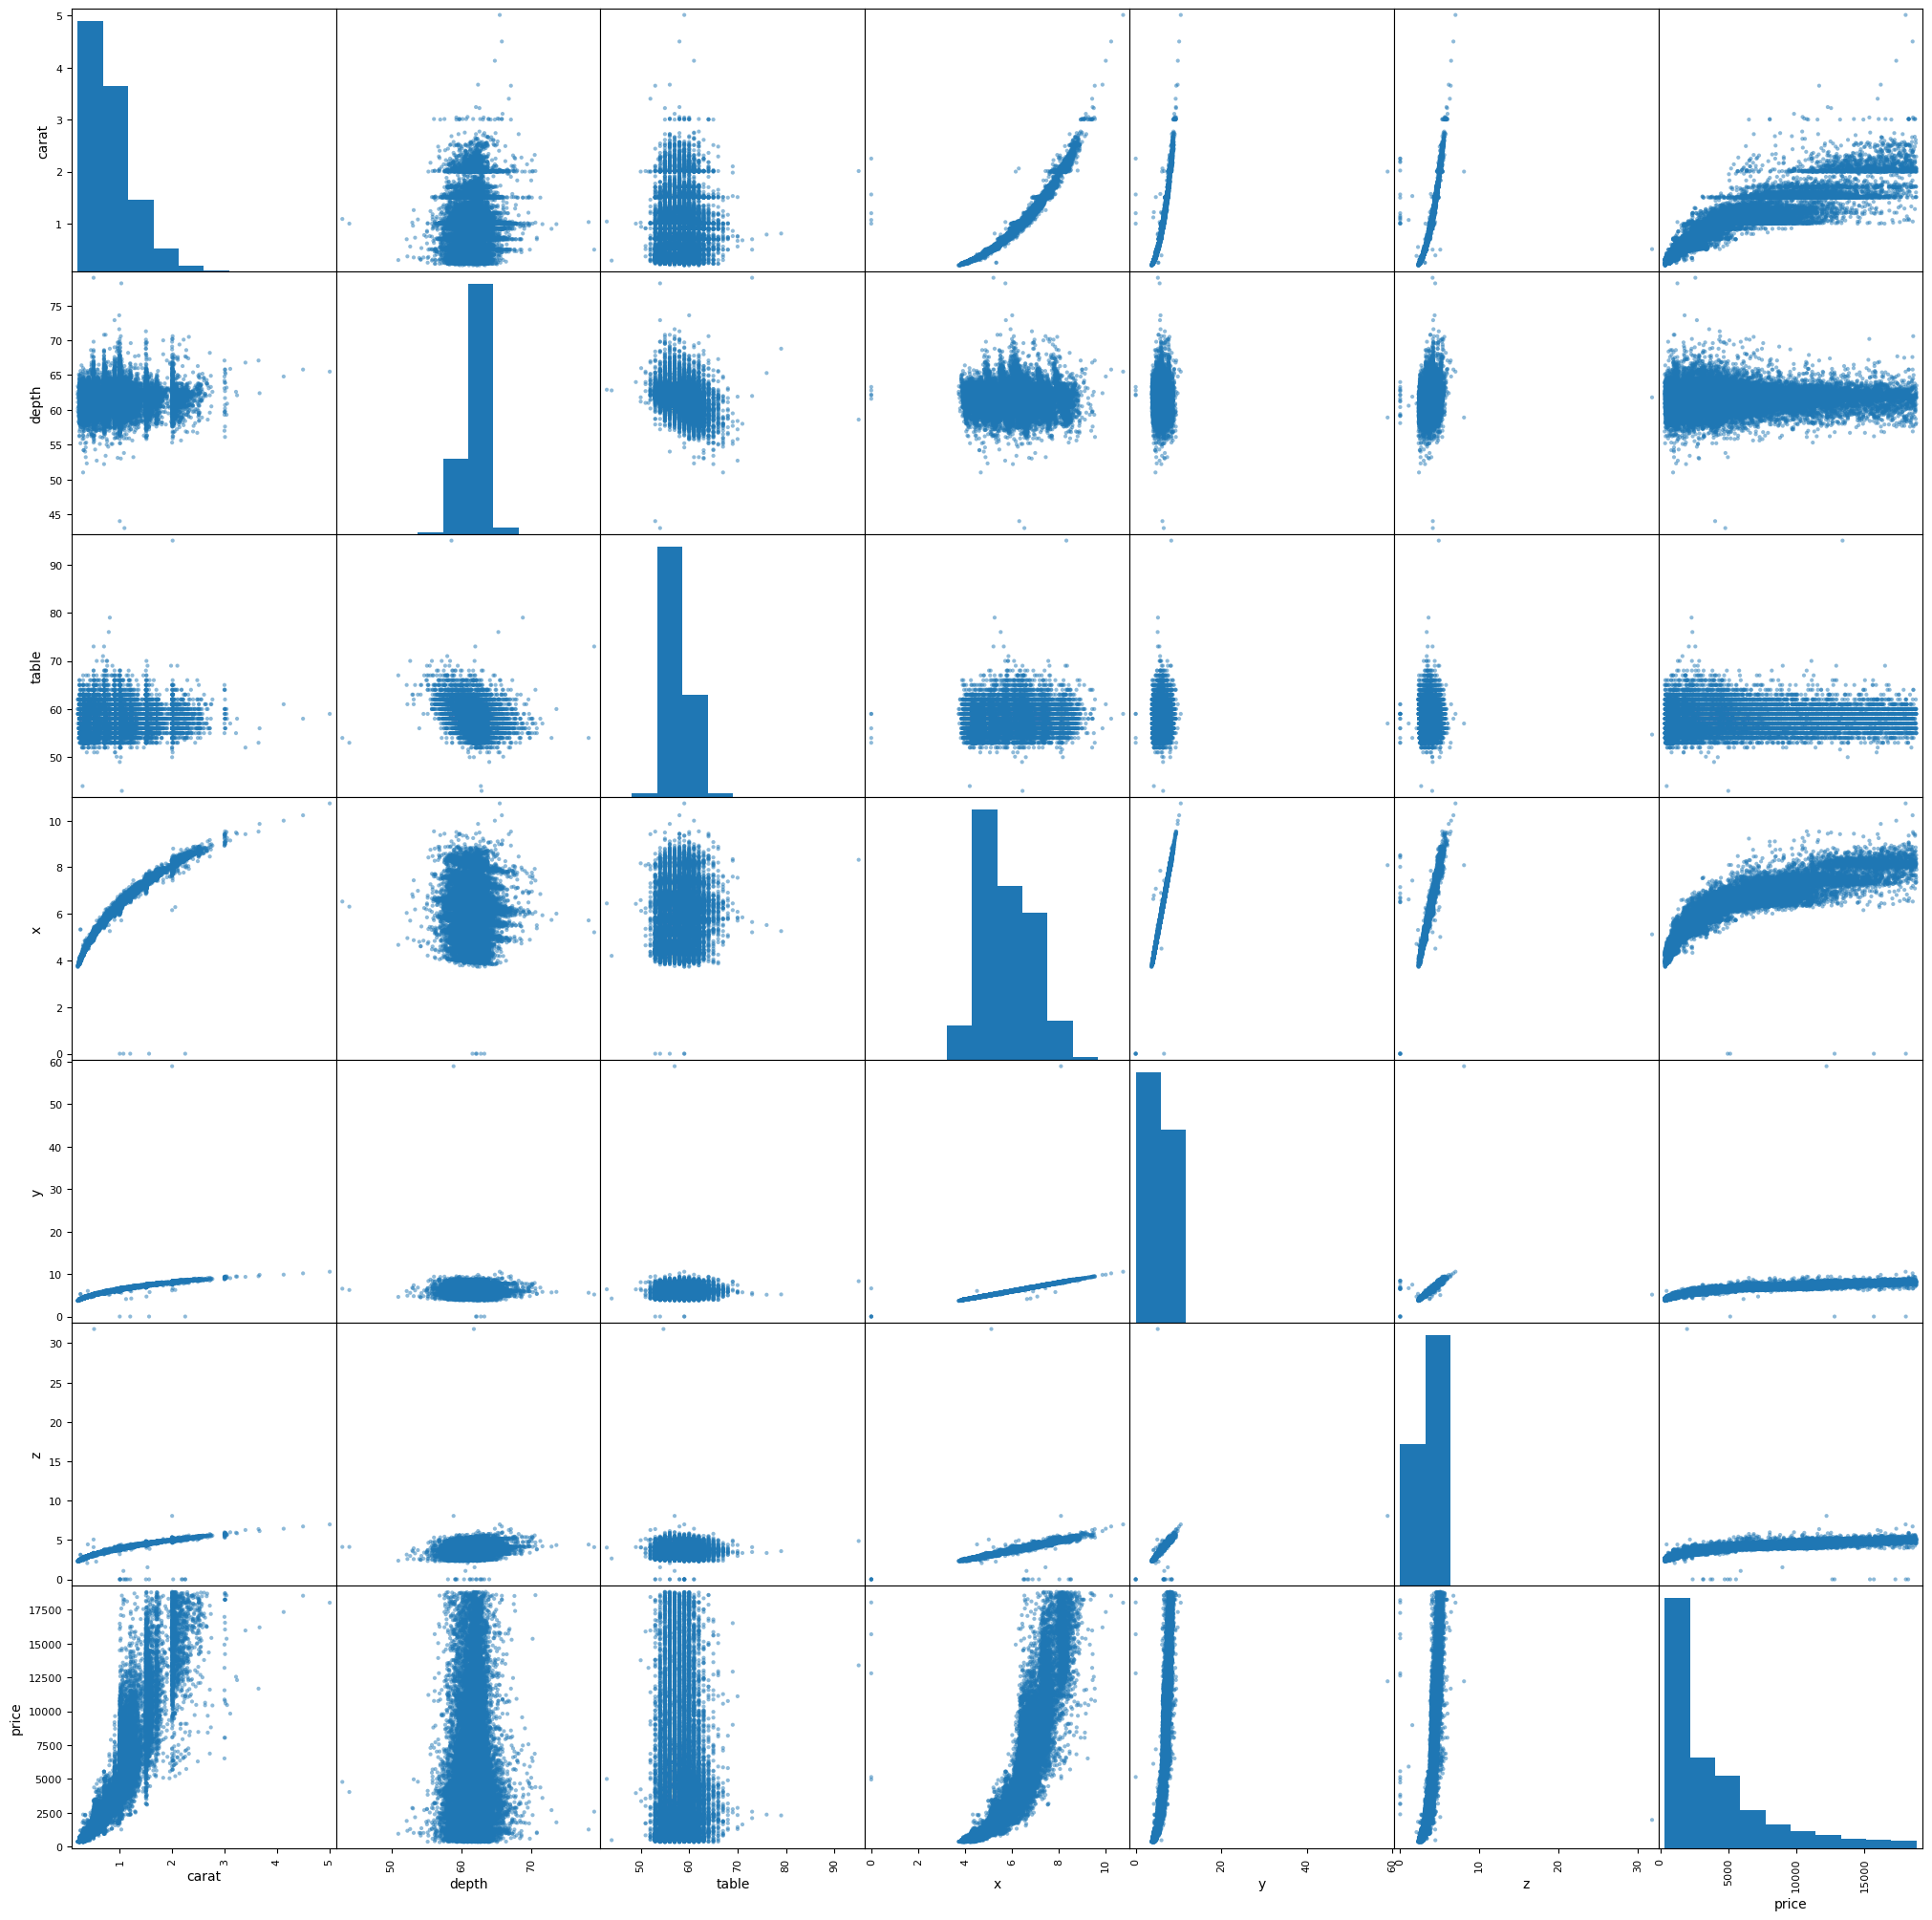

In [34]:
# belangrijkste features en target (price)
feats = ['carat','depth','table','x','y','z','price']
pd.plotting.scatter_matrix(train_set[feats],figsize=(25,25));

In [35]:
train_set.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.033516,0.177176,0.921729,0.974924,0.949135,0.946185
depth,0.033516,1.000000,-0.297302,-0.004225,-0.021104,-0.026131,0.098415
table,0.177176,-0.297302,1.000000,0.122367,0.192339,0.180855,0.146346
price,0.921729,-0.004225,0.122367,1.000000,0.884821,0.863298,0.855583
x,0.974924,-0.021104,0.192339,0.884821,1.000000,0.971878,0.963348
y,0.949135,-0.026131,0.180855,0.863298,0.971878,1.000000,0.942313
z,0.946185,0.098415,0.146346,0.855583,0.963348,0.942313,1.000000


## Maken van de data Pipeline

In [36]:
def preprocess(dataset,features,target):
    # uit de dataset de features halen
    X = dataset[features]
    # uit de dataset de target halen
    y = dataset[target]
    # object voor het transformeren van numerieke kolommen.
    # in steps komt een rij daarin tuples. Iedere tuple bevat een transformatie functie.
    # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie functie
    num_transform = Pipeline(steps=[('scaler',StandardScaler())])
    # object voor kolommen te transformeren
    # in tranformers zit een lijst van tuples met de transformers.
    # het eerste elem van de tuple is een naam (zelf te kiezen), het tweede elem is de transformatie (num_transform)
    # het derde elem zijn de kolommen waarop de transformatie moet gebeuren 
    coltransform = ColumnTransformer(transformers=[('num',num_transform,features)])
    # proces pipeline maken met daarin de transofrmaties
    process = Pipeline(steps=[('coltrans',coltransform)])
    # voer de transformatie uit
    # hier wordt de dataset getransformeerd naa de kolommen die we willen behouden
    # en het standaardiseren van de data (x-gem)/stdev
    X_res = process.fit_transform(X)
    # dataframe omzetten naar lijst
    y=list(y)
    # retourneren van de getransformeerde data
    return X_res,y
    

### Leerset door de data Pipeline sturen 

In [37]:
features = ['carat','depth','table','x','y','z']
target = 'price'

train_X,train_y = preprocess(train_set,features,target)
print('features train_set:')
print(train_X)
print('target')
print(train_y[:20])

features train_set:
[[ 0.86265905 -0.31143736 -0.20709927  1.05558107  0.98655568  0.9682529 ]
 [-1.02988861  0.17854897 -0.65621302 -1.20773446 -1.20254423 -1.16827649]
 [ 0.86265905  0.45854116 -0.20709927  0.90409932  0.95166963  0.98230901]
 ...
 [-0.987832   -1.01141784  0.24201448 -1.10971685 -1.11532909 -1.1823326 ]
 [ 0.21078152  0.73853335  0.69112823  0.35163648  0.25394854  0.39195221]
 [ 0.7154609  -0.94141979  0.24201448  0.96647416  0.91678357  0.79957952]]
target
[8131, 756, 10351, 2795, 4092, 738, 7056, 4034, 7641, 2671, 1170, 4015, 5640, 1786, 675, 1061, 505, 2809, 1179, 3112]


### Testset opsplitsen in test- en validatieset en deze door de Pipeline sturen

In [38]:
test_set,valid_set = train_test_split(test_set,test_size=0.4,random_state=42)
# random_state is randomseed voor de random functie
print('aantal entries in test_set:  ', len(test_set))
print('aantal entries in valid_set: ', len(valid_set))
print('stukje inhoud test_set:')
test_set.head()

# transformeren van de testset
test_X,test_y = preprocess(test_set,features,target)
print('features test_set:')
print(test_X)
print('target')
print(test_y[:20])

# transformeren van de validatieset
valid_X,valid_y = preprocess(valid_set,features,target)
print('features valid_set:')
print(valid_X)
print('target')
print(valid_y[:20])

aantal entries in test_set:   9709
aantal entries in valid_set:  6473
stukje inhoud test_set:
features test_set:
[[-0.53629775 -0.04095813 -1.08100535 -0.42583906 -0.3942894  -0.41949841]
 [-0.92268843  0.02936238 -0.18609354 -0.99983328 -1.01773179 -1.01503803]
 [-0.5577639  -0.39256072 -1.08100535 -0.45274504 -0.41185116 -0.47759983]
 ...
 [-1.00855303 -0.11127865 -1.08100535 -1.15230049 -1.09675969 -1.14576624]
 [ 1.41712178 -2.22089416  4.73592139  1.55623474  1.41457161  1.17829083]
 [ 0.45114509 -2.29121468 -1.08100535  0.67730609  0.61551165  0.3503455 ]]
target
[1187, 810, 1857, 628, 752, 1819, 1438, 1235, 2065, 1043, 4474, 934, 8538, 1020, 2153, 13849, 15185, 2405, 696, 3391]
features valid_set:
[[-0.56492544 -0.11032613 -0.65667414 -0.44392901 -0.48431198 -0.47248165]
 [-0.56492544  0.02563599 -0.65667414 -0.46164839 -0.4932363  -0.47248165]
 [-0.20852198 -1.60590939  1.97685749 -0.0186638   0.02437401 -0.20005267]
 ...
 [ 0.46235511 -0.04234507 -0.65667414  0.59265494  0.675

## Leren van modellen

### Model Lineaire Regressie

In [39]:
# lineaire regressor object maken
lin_reg = LinearRegression()
# fitten van de features (train_X)
lin_reg.fit(train_X,train_y)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred = lin_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse = np.sqrt(lin_mse)
print('RMSE:',lin_rmse)

RMSE: 1504.3117920723394


<h4>coefficiënten en offset van het model</h4>

In [40]:
print('coefficiënten van de vgl:', lin_reg.coef_)
print('offset van de vgl:', lin_reg.intercept_)

coefficiënten van de vgl: [ 5039.25634425  -285.98184814  -230.38400775 -1396.66436436
    37.0862656     32.10913907]
offset van de vgl: 3951.4953122517104


<p>price = 5039*carat -286*depth - 230*table - 1396*x + 37*y + 32*z + 3951</p>
<p>lineair model is <b>onvoldoende</b> om prijs te voorspellen</p>

### Model Polynoom (kromme)

In [41]:
# Polyfeature object maken
poly_feats = PolynomialFeatures(degree=2,include_bias=False)
# toevoegen van datapunten tot de 2de macht
# x1 en x2 zijn features -> er wordt bijgemaakt : x1*x1, x2.x2 en x1*x2
train_X_poly = poly_feats.fit_transform(train_X)
print('Leerset na polyfeatures transformatie:')
print(train_X_poly)

# door een lineaire regressor sturen
# lineaire regressor object maken
lin_reg = LinearRegression()
# fitten van de features (train_X)
lin_reg.fit(train_X_poly,train_y)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred = lin_reg.predict(train_X_poly)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse = np.sqrt(lin_mse)
print('RMSE:',lin_rmse)

Leerset na polyfeatures transformatie:
[[ 0.86265905 -0.31143736 -0.20709927 ...  0.97329211  0.9552354
   0.93751367]
 [-1.02988861  0.17854897 -0.65621302 ...  1.44611262  1.40490415
   1.36486995]
 [ 0.86265905  0.45854116 -0.20709927 ...  0.90567508  0.93483365
   0.96493099]
 ...
 [-0.987832   -1.01141784  0.24201448 ...  1.24395898  1.31868995
   1.39791038]
 [ 0.21078152  0.73853335  0.69112823 ...  0.06448986  0.09953569
   0.15362653]
 [ 0.7154609  -0.94141979  0.24201448 ...  0.84049212  0.73304137
   0.63932741]]
RMSE: 1405.0499467505401


In [42]:
for d in range(2,7):
    # Polyfeature object maken
    poly_feats = PolynomialFeatures(degree=d,include_bias=False)
    train_X_poly = poly_feats.fit_transform(train_X)
    # door een lineaire regressor sturen
    # lineaire regressor object maken
    lin_reg = LinearRegression()
    # fitten van de features (train_X)
    lin_reg.fit(train_X_poly,train_y)
    # lineaire vergelijking
    # voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
    y_pred = lin_reg.predict(train_X_poly)
    # bepalen van Mean Square Error van de voorspelde tov de echte waarden
    lin_mse = mean_squared_error(y_pred,train_y)
    # bepalen van RMSE (Root Mean Square Error)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE voor degree:',d,'is',lin_rmse)   

RMSE voor degree: 2 is 1405.0499467505401
RMSE voor degree: 3 is 1373.077760376369
RMSE voor degree: 4 is 1360.44342855186
RMSE voor degree: 5 is 1345.9485231744186
RMSE voor degree: 6 is 1322.9119114893567


### Model SVM (Support Vector Machine)

In [44]:
svm_rbf_reg = SVR(kernel='rbf',C=1000,epsilon=1)
# kernel is transformator voor de data
# C is de gevoeligheid van het model. Hoe groter, hoe minder gevoelig
# epsilon bepaalt de breedte van de 'straat'
# nu wordt het model geleerd
svm_rbf_reg.fit(train_X,train_y)
# voorspellen met behulp van geleerd model
y_pred = svm_rbf_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
svm_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
svm_rmse = np.sqrt(svm_mse)
print('RMSE:',svm_rmse)

RMSE: 1404.5667697096399


### Model Decision Tree als regressor

In [46]:
tree_reg = DecisionTreeRegressor()
# trainen van het model
tree_reg.fit(train_X,train_y)
# voorspellen met behulp van geleerd model
y_pred = tree_reg.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_mse = mean_squared_error(y_pred,train_y)
# bepalen van RMSE (Root Mean Square Error)
tree_rmse = np.sqrt(tree_mse)
print('RMSE:',tree_rmse)

RMSE: 124.80514563668693


<h4>Testen resultaat van decision tree</h4>

In [47]:
# testen van testset
y_pred = tree_reg.predict(test_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_test_mse = mean_squared_error(y_pred,test_y)
# bepalen van RMSE (Root Mean Square Error)
tree_test_rmse = np.sqrt(tree_test_mse)
print('RMSE:',tree_test_rmse)

RMSE: 1921.3607034774411


In [48]:
# test van validatieset
y_pred = tree_reg.predict(valid_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_valid_mse = mean_squared_error(y_pred,valid_y)
# bepalen van RMSE (Root Mean Square Error)
tree_valid_rmse = np.sqrt(tree_valid_mse)
print('RMSE:',tree_valid_rmse)

RMSE: 1962.595843342428


<p>Decision Tree model fit te goed (overfit). Resultaat train set is veel beter dan test en validatie set. Om goed te zijn moeten alle sets ongeveer dezelfde (lage) RMSE hebben</p>

<h4>Verschillende combinaties van de hyperparameters : max_dept en min_sample_leaf uitproberen met Grid Search Cross Validation</h4>

In [53]:
# max_depth = maximale diepte van de tree
# min_samples_leaf = minimum aantal samples in de 'linker' en 'rechter' klasse van een node in de tree.
# hoge getallen zijn stabieler dan lage getallen
# hyper_params_grid : combinaties van de te testen hyperparameters. Per dictionary een andere combinatie.
#    1ste combinatie: 4x max_dept en 5x min_samples_leaf
#    2de combinatie: 3s max_depth
#    3de combinatie: 6x min_samples_leaf
#    In totaal: 20+3+6 = 29 testen
hyper_params_grid = [{'max_depth':[10,20,30,40],'min_samples_leaf':[2,4,8,16,32]},
                     {'max_depth':[16,32,64]},{'min_samples_leaf':[2,4,8,16,32,64]}]
# combinaties uitvoeren
tree_reg_gs = DecisionTreeRegressor()
# maken van het GridSearchCV object
# param1: regressor
# param2: grid search combinaties
# param3: cv=5 -> leerset opdelen in 5 groepen, 4 om te leren 1 om te testen. Opdeling 5x uitvoeren.
grid = GridSearchCV(tree_reg_gs,hyper_params_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# leren en testen van de verschillende modellen
grid.fit(train_X,train_y)
# ophalen resultaten
# met zip wordt de gemiddelde test score gecombineerd met combinatie hyperparameters en met de for lus overlopen
res = grid.cv_results_
for mean_score,hyper_params in zip(res['mean_test_score'],res['params']):
    print(np.sqrt(-mean_score),hyper_params)

1425.6635462386328 {'max_depth': 10, 'min_samples_leaf': 2}
1421.1958980258153 {'max_depth': 10, 'min_samples_leaf': 4}
1414.0079992741362 {'max_depth': 10, 'min_samples_leaf': 8}
1406.8889635697992 {'max_depth': 10, 'min_samples_leaf': 16}
1395.6735115931972 {'max_depth': 10, 'min_samples_leaf': 32}
1701.4717243116459 {'max_depth': 20, 'min_samples_leaf': 2}
1602.674319030357 {'max_depth': 20, 'min_samples_leaf': 4}
1511.4302230084988 {'max_depth': 20, 'min_samples_leaf': 8}
1442.5097684613015 {'max_depth': 20, 'min_samples_leaf': 16}
1410.316234647474 {'max_depth': 20, 'min_samples_leaf': 32}
1767.1032068032994 {'max_depth': 30, 'min_samples_leaf': 2}
1623.4021344251344 {'max_depth': 30, 'min_samples_leaf': 4}
1514.785005100147 {'max_depth': 30, 'min_samples_leaf': 8}
1442.720504750784 {'max_depth': 30, 'min_samples_leaf': 16}
1410.377858744398 {'max_depth': 30, 'min_samples_leaf': 32}
1769.4767658511478 {'max_depth': 40, 'min_samples_leaf': 2}
1622.8713312635323 {'max_depth': 40, 'm

<h4>Testen van test en validatieset met als hyperparameter min_samples_leaf=64</h4>

In [55]:
# Eerst laten leren met de vermelde hyperparameter
tree_1= DecisionTreeRegressor(min_samples_leaf=64)
tree_1.fit(train_X,train_y)

# RMSE van leerset
pred_y_train = tree_1.predict(train_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_train_mse = mean_squared_error(pred_y_train,train_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_train_rmse = np.sqrt(tree_1_train_mse)
print('RMSE leerset:',tree_1_train_rmse)

# RMSE van testset
pred_y_test = tree_1.predict(test_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_test_mse = mean_squared_error(pred_y_test,test_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_test_rmse = np.sqrt(tree_1_test_mse)
print('RMSE testset:',tree_1_test_rmse)

# RMSE van validatieset
pred_y_valid = tree_1.predict(valid_X)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
tree_1_valid_mse = mean_squared_error(pred_y_valid,valid_y)
# bepalen van RMSE (Root Mean Square Error)
tree_1_valid_rmse = np.sqrt(tree_1_valid_mse)
print('RMSE validatieset:',tree_1_valid_rmse)

RMSE leerset: 1332.5740216498207
RMSE testset: 1362.9770261592266
RMSE validatieset: 1408.3520973494033


<h4>Bepalen mbv Decision Tree wat de belangrijkste features zijn</h4>

In [56]:
print('gewicht per feature')
print(tree_1.feature_importances_)

gewicht per feature
[0.69139342 0.00267902 0.00428873 0.00229387 0.29660345 0.00274151]


<p>De features carat (gewicht: 0.69) en y (gewicht: 0.29) zijn de belangrijkste features.</p>

## Opdracht: testen dataset met enkel de features carat en y

### Leerset door dataPipeline sturen maar enkel met features carat en y

In [57]:
features = ['carat','y']
target = 'price'

train_X_2,train_y_2 = preprocess(train_set,features,target)
print('features train_set:')
print(train_X_2)
print('target')
print(train_y_2[:20])

features train_set:
[[ 0.86265905  0.98655568]
 [-1.02988861 -1.20254423]
 [ 0.86265905  0.95166963]
 ...
 [-0.987832   -1.11532909]
 [ 0.21078152  0.25394854]
 [ 0.7154609   0.91678357]]
target
[8131, 756, 10351, 2795, 4092, 738, 7056, 4034, 7641, 2671, 1170, 4015, 5640, 1786, 675, 1061, 505, 2809, 1179, 3112]


### Lineaire regressie 

In [59]:
# lineaire regressor object maken
lin_reg_2 = LinearRegression()
# fitten van de features (train_X)
lin_reg_2.fit(train_X_2,train_y_2)
# lineaire vergelijking
# voorspellen van de leerset met behulp van de gefitte lineaire vergelijking
y_pred_2 = lin_reg_2.predict(train_X_2)
# bepalen van Mean Square Error van de voorspelde tov de echte waarden
lin_mse_2 = mean_squared_error(y_pred_2,train_y_2)
# bepalen van RMSE (Root Mean Square Error)
lin_rmse_2 = np.sqrt(lin_mse_2)
print('RMSE:',lin_rmse_2)

RMSE: 1546.8472644698793
